# Required libralies

In [ ]:
import pandas as pd
import numpy as np
import math
import scipy.stats.stats
import seaborn

# Connect Google Drive

# Vectors (Boxes)

### Reading from CSV file

In [ ]:
boxes = pd.read_csv("/content/boxes.csv")

In [ ]:
boxes.head()

,Instance,Width,Height,Weight
0,box1,4,4.0,2.5
1,box2,4,2.5,4.0


In [ ]:
type(boxes)

pandas.core.frame.DataFrame

In [ ]:
boxes.dtypes

Instance     object
Width         int64
Height      float64
Weight      float64
dtype: object

In [ ]:
boxes.describe()

,Width,Height,Weight
count,2.0,2.00000,2.00000
mean,4.0,3.25000,3.25000
std,0.0,1.06066,1.06066
min,4.0,2.50000,2.50000
25%,4.0,2.87500,2.87500
50%,4.0,3.25000,3.25000
75%,4.0,3.62500,3.62500
max,4.0,4.00000,4.00000


In [ ]:
boxes.columns

Index(['Instance', 'Width', 'Height', 'Weight'], dtype='object')

In [ ]:
boxes['Width']

0    4
1    4
Name: Width, dtype: int64

In [ ]:
boxes.set_index("Instance", inplace=True)

In [ ]:
value_columns = [i for i in boxes.columns if i != "Instance"]

In [ ]:
value_columns

['Width', 'Height', 'Weight']

In [ ]:
boxes = boxes[value_columns]

In [ ]:
boxes

,Width,Height,Weight
Instance,,,
box1,4,4.0,2.5
box2,4,2.5,4.0


In [ ]:
boxes.columns

Index(['Width', 'Height', 'Weight'], dtype='object')

In [ ]:
np.array(boxes["Width"])

array([4, 4])

In [ ]:
np.array(boxes.iloc[1,:])

array([4. , 2.5, 4. ])

### Creating a vector

In [ ]:
box1 = np.array(boxes.loc["box1", :])
print(box1)

[4.  4.  2.5]


In [ ]:
box2 = np.array(boxes.loc["box2", :])
print(box2)

[4.  2.5 4. ]


In [ ]:
box1[0]

4.0

In [ ]:
box1[1]

4.0

In [ ]:
box2 - box1

array([ 0. , -1.5,  1.5])

In [ ]:
box1/2

array([2.  , 2.  , 1.25])

In [ ]:
np.mean(box1)

3.5

In [ ]:
def mean_square_diff(v1,v2):
  return np.mean([(v1[i]-v2[i])**2 for i in range(len(v1))])

In [ ]:
mean_square_diff(box1,box1)

0.0

In [ ]:
mean_square_diff(box1,box2)

1.5

### Dot operator

In [ ]:
def unit_scale(vec):
  """Scale vector to be unit length"""
  vec = vec/math.sqrt(np.dot(vec,vec))
  return vec

In [ ]:
box1_scaled = unit_scale(box1)
print(box1_scaled)

[0.64676167 0.64676167 0.40422604]


In [ ]:
box2_scaled = unit_scale(box2)
print(box2_scaled)

[0.64676167 0.40422604 0.64676167]


In [ ]:
np.dot(box1_scaled, box2_scaled)

0.9411764705882353

In [ ]:
np.dot(box1_scaled,box1_scaled)

1.0

In [ ]:
def center_unit_scale(vec):
  """Shift and scale vector to be mean zero and unit lenght"""
  vec = vec - np.mean(vec)
  vec = vec/math.sqrt(np.dot(vec,vec))
  return vec

In [ ]:
box1_std = center_unit_scale(box1)
print(box1_std)

[ 0.40824829  0.40824829 -0.81649658]


In [ ]:
np.mean(box1_std)

0.0

In [ ]:
np.dot(box1_std,box1_std)

1.0000000000000002

In [ ]:
box2_std = center_unit_scale(box2)
print(box2_std)

[ 0.40824829 -0.81649658  0.40824829]


In [ ]:
np.dot(box1_std,box2_std)

-0.5000000000000001

In [ ]:
plot_frame = boxes.T
plot_frame["measure"] = plot_frame.index
plot_frame

Instance,box1,box2,measure
Width,4.0,4.0,Width
Height,4.0,2.5,Height
Weight,2.5,4.0,Weight


In [ ]:
plot_frame.columns

Index(['box1', 'box2', 'measure'], dtype='object', name='Instance')

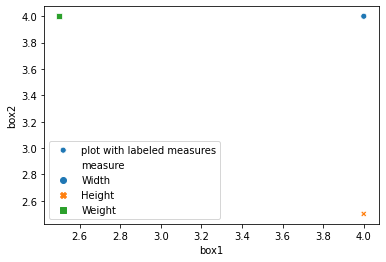

In [ ]:
seaborn.scatterplot(data=plot_frame, x="box1", y="box2",
                    hue="measure", style="measure",
                    label="plot with labeled measures")

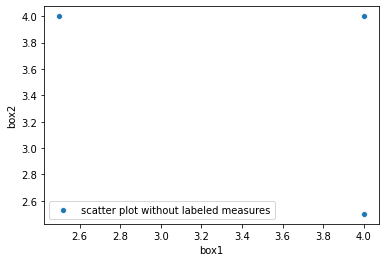

In [ ]:
seaborn.scatterplot(data=plot_frame, x = "box1", y="box2",
                    label="scatter plot without labeled measures")

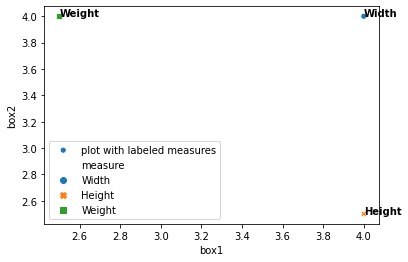

In [ ]:
plt = seaborn.scatterplot(data=plot_frame, x="box1", y="box2",
                          hue="measure", style="measure",
                          label="plot with labeled measures")
for i in range(0, plot_frame.shape[0]):
  plt.text(plot_frame["box1"][i], plot_frame["box2"][i], plot_frame["measure"][i],
           horizontalalignment="left", size="medium", color="black", weight="semibold")

# Vectors (Students)

### Reading from Excel file

In [ ]:
stu = pd.read_csv("/content/Student.csv")

In [ ]:
stu.head()

,Height (ft),Weight(kg),"Gender (F=1, M=2)"
Student,,,
Jame,5.5,106,2
Tae,5.0,50,2
Oil,5.0,45,1
V,5.2,67,1
Ton,5.7,70,2


In [ ]:
type(stu)

pandas.core.frame.DataFrame

In [ ]:
stu.dtypes

Student               object
Height (ft)          float64
Weight(kg)             int64
Gender (F=1, M=2)      int64
dtype: object

In [ ]:
stu.describe()

,Height (ft),Weight(kg),"Gender (F=1, M=2)"
count,7.000000,7.000000,7.000000
mean,5.314286,62.857143,1.571429
std,0.313202,21.200854,0.534522
min,5.000000,45.000000,1.000000
25%,5.050000,50.000000,1.000000
50%,5.200000,52.000000,2.000000
75%,5.600000,68.500000,2.000000
max,5.700000,106.000000,2.000000


In [ ]:
stu.columns

Index(['Student', 'Height (ft)', 'Weight(kg)', 'Gender (F=1, M=2)'], dtype='object')

In [ ]:
stu['Height (ft)']

0    5.5
1    5.0
2    5.0
3    5.2
4    5.7
5    5.1
6    5.7
Name: Height (ft), dtype: float64

In [ ]:
stu.set_index('Student', inplace=True)

In [ ]:
value_columns = [i for i in stu.columns if i != "Instance"]

In [ ]:
value_columns

['Height (ft)', 'Weight(kg)', 'Gender (F=1, M=2)']

In [ ]:
stu = stu[value_columns]

In [ ]:
stu

,Height (ft),Weight(kg),"Gender (F=1, M=2)"
Student,,,
Jame,5.5,106,2
Tae,5.0,50,2
Oil,5.0,45,1
V,5.2,67,1
Ton,5.7,70,2
Gift,5.1,50,1
Mos,5.7,52,2


In [ ]:
stu.columns

Index(['Height (ft)', 'Weight(kg)', 'Gender (F=1, M=2)'], dtype='object')

In [ ]:
np.array(stu["Height (ft)"])

array([5.5, 5. , 5. , 5.2, 5.7, 5.1, 5.7])

In [ ]:
np.array(stu.iloc[1,:])

array([ 5., 50.,  2.])

##Tae & Mos

### Creating a vector

In [ ]:
Tae = np.array(stu.loc["Tae", :])
print(Tae)

[ 5. 50.  2.]


In [ ]:
Mos = np.array(stu.loc["Mos", :])
print(Mos)

[ 5.7 52.   2. ]


In [ ]:
Tae[0]

5.0

In [ ]:
Tae[1]

50.0

In [ ]:
Mos - Tae

array([0.7, 2. , 0. ])

In [ ]:
Tae/2

array([ 2.5, 25. ,  1. ])

In [ ]:
np.mean(Tae)

19.0

In [ ]:
def mean_square_diff(v1,v2):
  return np.mean([(v1[i]-v2[i])**2 for i in range(len(v1))])

In [ ]:
mean_square_diff(Tae,Tae)

0.0

In [ ]:
mean_square_diff(Tae,Mos)

1.4966666666666668

### Dot operator

In [ ]:
def unit_scale(vec):
  """Scale vector to be unit length"""
  vec = vec/math.sqrt(np.dot(vec,vec))
  return vec

#### Unit Vector



In [ ]:
Tae_scaled = unit_scale(Tae)
print(Tae_scaled)

[0.099425   0.99424998 0.03977   ]


In [ ]:
Mos_scaled = unit_scale(Mos)
print(Mos_scaled)

[0.10888317 0.99332012 0.03820462]


In [ ]:
np.dot(Tae_scaled, Mos_scaled)

0.9999536139938384

In [ ]:
np.dot(Tae_scaled,Tae_scaled)

1.0

In [ ]:
def center_unit_scale(vec):
  """Shift and scale vector to be mean zero and unit lenght"""
  vec = vec - np.mean(vec)
  vec = vec/math.sqrt(np.dot(vec,vec))
  return vec

In [ ]:
Tae_std = center_unit_scale(Tae)
print(Tae_std)

[-0.36816618  0.81522511 -0.44705893]


In [ ]:
np.mean(Tae_std)

1.850371707708594e-17

In [ ]:
np.dot(Tae_std,Tae_std)

1.0

In [ ]:
Mos_std = center_unit_scale(Mos)
print(Mos_std)

[-0.36039448  0.81469457 -0.45430009]


In [ ]:
np.dot(Tae_std,Mos_std)

0.9999434424636737

In [ ]:
plot_frame = stu.T
plot_frame["measure"] = plot_frame.index
plot_frame

Student,Jame,Tae,Oil,V,Ton,Gift,Mos,measure
Height (ft),5.5,5.0,5.0,5.2,5.7,5.1,5.7,Height (ft)
Weight(kg),106.0,50.0,45.0,67.0,70.0,50.0,52.0,Weight(kg)
"Gender (F=1, M=2)",2.0,2.0,1.0,1.0,2.0,1.0,2.0,"Gender (F=1, M=2)"


In [ ]:
plot_frame.columns

Index(['Jame', 'Tae', 'Oil', 'V', 'Ton', 'Gift', 'Mos', 'measure'], dtype='object', name='Student')

<Axes: xlabel='Tae', ylabel='Mos'>

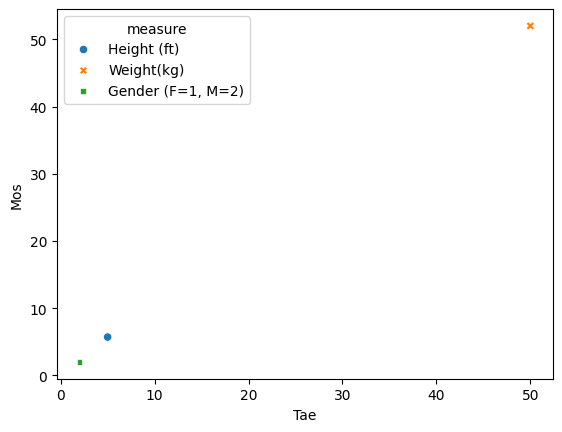

In [ ]:
seaborn.scatterplot(data=plot_frame, x="Tae", y="Mos",
                    hue="measure", style="measure")

<Axes: xlabel='Tae', ylabel='Mos'>

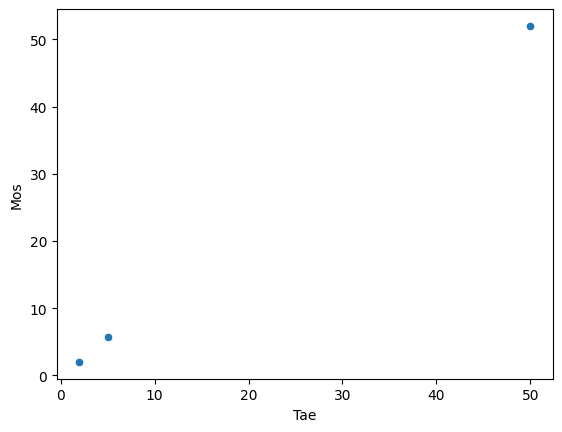

In [ ]:
seaborn.scatterplot(data=plot_frame, x = "Tae", y="Mos")

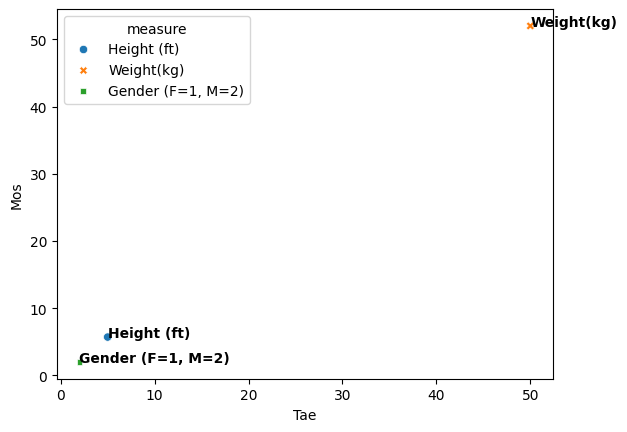

In [ ]:
plt = seaborn.scatterplot(data=plot_frame, x="Tae", y="Mos",
                          hue="measure", style="measure")
for i in range(0, plot_frame.shape[0]):
  plt.text(plot_frame["Tae"][i], plot_frame["Mos"][i], plot_frame["measure"][i],
           horizontalalignment="left", size="medium", color="black", weight="semibold")

##Jame & Gift

### Creating a vector

In [ ]:
Jame = np.array(stu.loc["Jame", :])
print(Jame)

[  5.5 106.    2. ]


In [ ]:
Gift = np.array(stu.loc["Gift", :])
print(Gift)

[ 5.1 50.   1. ]


In [ ]:
Jame[0]

5.5

In [ ]:
Jame[1]

106.0

In [ ]:
Gift - Jame

array([ -0.4, -56. ,  -1. ])

In [ ]:
Jame/2

array([ 2.75, 53.  ,  1.  ])

In [ ]:
np.mean(Jame)

37.833333333333336

In [ ]:
def mean_square_diff(v1,v2):
  return np.mean([(v1[i]-v2[i])**2 for i in range(len(v1))])

In [ ]:
mean_square_diff(Jame,Jame)

0.0

In [ ]:
mean_square_diff(Jame,Gift)

1045.72

### Dot operator

In [ ]:
def unit_scale(vec):
  """Scale vector to be unit length"""
  vec = vec/math.sqrt(np.dot(vec,vec))
  return vec

#### Unit Vector


In [ ]:
Jame_scaled = unit_scale(Jame)
print(Jame_scaled)

[0.05180789 0.99847936 0.01883923]


In [ ]:
Gift_scaled = unit_scale(Gift)
print(Gift_scaled)

[0.10145342 0.99464138 0.01989283]


In [ ]:
np.dot(Jame_scaled, Gift_scaled)

0.998759740629173

In [ ]:
np.dot(Gift_scaled, Gift_scaled)

1.0

In [ ]:
def center_unit_scale(vec):
  """Shift and scale vector to be mean zero and unit lenght"""
  vec = vec - np.mean(vec)
  vec = vec/math.sqrt(np.dot(vec,vec))
  return vec

In [ ]:
Jame_std = center_unit_scale(Jame)
print(Jame_std)

[-0.38711683  0.81613806 -0.42902123]


In [ ]:
np.mean(Jame_std)

-7.401486830834377e-17

In [ ]:
np.dot(Jame_std,Jame_std)

0.9999999999999998

In [ ]:
Gift_std = center_unit_scale(Gift)
print(Gift_std)

[-0.35376145  0.81417157 -0.46041012]


In [ ]:
np.dot(Jame_std,Gift_std)

0.9989491444558489

In [ ]:
plot_frame = stu.T
plot_frame["measure"] = plot_frame.index
plot_frame

Student,Jame,Tae,Oil,V,Ton,Gift,Mos,measure
Height (ft),5.5,5.0,5.0,5.2,5.7,5.1,5.7,Height (ft)
Weight(kg),106.0,50.0,45.0,67.0,70.0,50.0,52.0,Weight(kg)
"Gender (F=1, M=2)",2.0,2.0,1.0,1.0,2.0,1.0,2.0,"Gender (F=1, M=2)"


In [ ]:
plot_frame.columns

Index(['Jame', 'Tae', 'Oil', 'V', 'Ton', 'Gift', 'Mos', 'measure'], dtype='object', name='Student')

<Axes: xlabel='Jame', ylabel='Gift'>

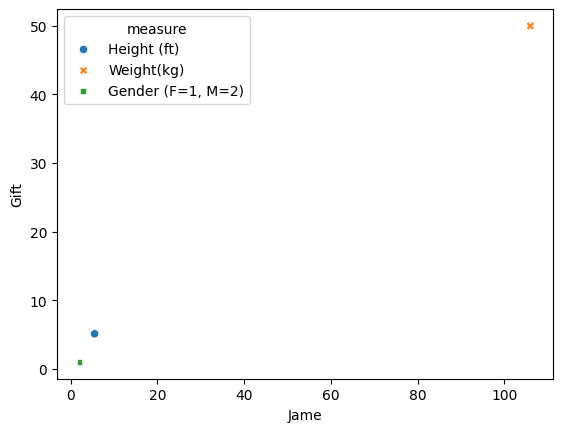

In [ ]:
seaborn.scatterplot(data=plot_frame, x="Jame", y="Gift",
                    hue="measure", style="measure")

<Axes: xlabel='Jame', ylabel='Gift'>

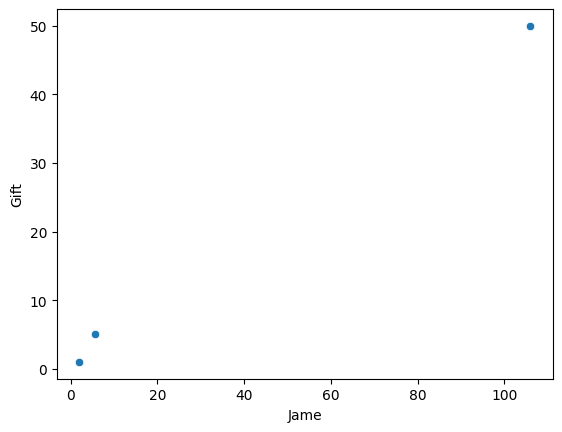

In [ ]:
seaborn.scatterplot(data=plot_frame, x = "Jame", y="Gift")

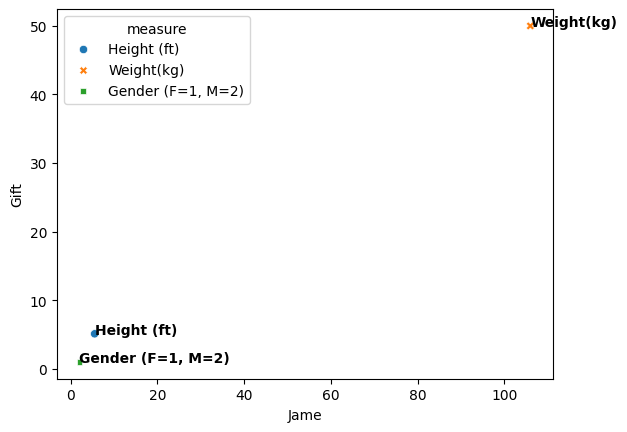

In [ ]:
plt = seaborn.scatterplot(data=plot_frame, x="Jame", y="Gift",
                          hue="measure", style="measure")
for i in range(0, plot_frame.shape[0]):
  plt.text(plot_frame["Jame"][i], plot_frame["Gift"][i], plot_frame["measure"][i],
           horizontalalignment="left", size="medium", color="black", weight="semibold")

# Matrixes

### Creating a matirx

In [ ]:
A = np.array([[1,2,4],[2,4,3],[0,1,1]])
A

array([[1, 2, 4],
       [2, 4, 3],
       [0, 1, 1]])

In [ ]:
E = np.arange(1,10)
E

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
E = E.reshape(3,3)
E

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
F = np.arange(0,11,2)
F.reshape(3,2)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Transposing a matrix

In [ ]:
D = np.array([[3,4,2],[1,5,4]])
print(D)
print('\n')
X=D.T
X

[[3 4 2]
 [1 5 4]]




array([[3, 1],
       [4, 5],
       [2, 4]])

In [ ]:
B = np.array([[2,-1],[3,2]])
print(B)
print('\n')
B = B.transpose()
B


[[ 2 -1]
 [ 3  2]]




array([[ 2,  3],
       [-1,  2]])

### Matrix multiplication

In [ ]:
A1 = np.arange(1,10).reshape(3,3)
A1


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
A2 = np.arange(5,14).reshape(3,3)
A2

array([[ 5,  6,  7],
       [ 8,  9, 10],
       [11, 12, 13]])

In [ ]:
#Element wise multiplication
A3 = A1*A2
A3

array([[  5,  12,  21],
       [ 32,  45,  60],
       [ 77,  96, 117]])

In [ ]:
#Dot matrix
A4 = A1.dot(A2)
A4

array([[ 54,  60,  66],
       [126, 141, 156],
       [198, 222, 246]])

In [ ]:
I = A.dot(D.T)
I

array([[19, 27],
       [28, 34],
       [ 6,  9]])

### Adding and subtracting a matrix

In [ ]:
C = np.array([[1,-1,0],[3,1,2],[1,2,5]])
C

array([[ 1, -1,  0],
       [ 3,  1,  2],
       [ 1,  2,  5]])

In [ ]:
G = A + C
G

array([[2, 1, 4],
       [5, 5, 5],
       [1, 3, 6]])

In [ ]:
H = A - C
H

array([[ 0,  3,  4],
       [-1,  3,  1],
       [-1, -1, -4]])

In [ ]:
J = A*C
J

array([[ 1, -2,  0],
       [ 6,  4,  6],
       [ 0,  2,  5]])